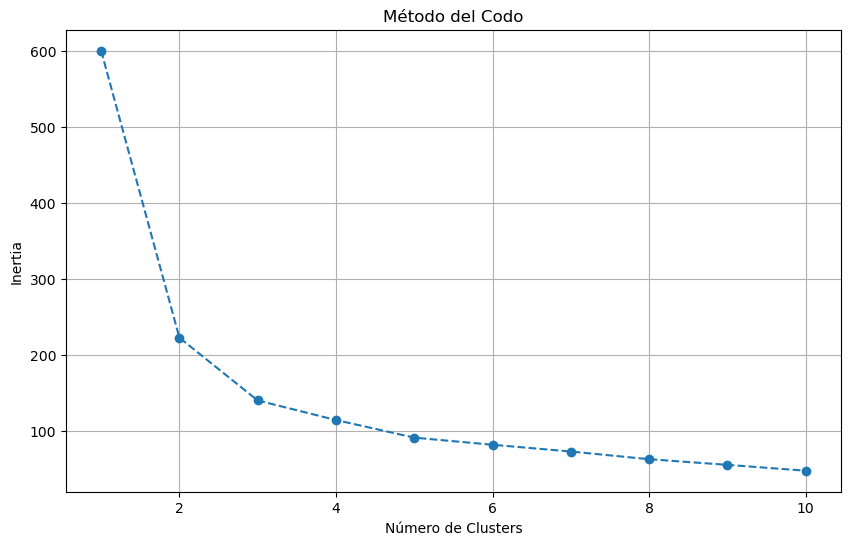

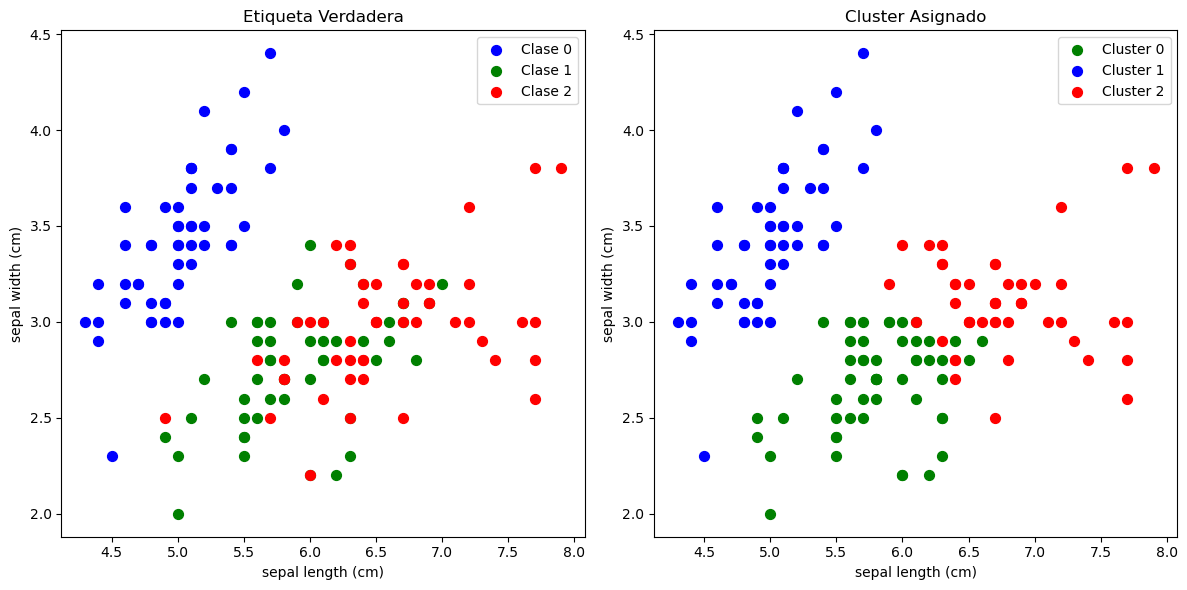

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Cargar el dataset Iris
iris = load_iris()
X = iris.data  # características
y = iris.target  # etiquetas
feature_names = iris.feature_names

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar el número óptimo de clusters usando el método del codo
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

# Elegir el número óptimo de clusters basado en el método del codo
optimal_clusters = 3  # Seleccionamos 3 clusters basado en el gráfico

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Comparar los resultados de la clusterización con las etiquetas verdaderas
plt.figure(figsize=(12, 6))

# Definir colores para las etiquetas y clusters
colors = ['blue', 'green', 'red']

plt.subplot(1, 2, 1)
for i in range(len(np.unique(y))):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Clase {i}', c=colors[i], cmap='viridis', s=50)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Etiqueta Verdadera')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(len(np.unique(cluster_labels))):
    # Intercambiar azul y verde
    if i == 0:
        plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label=f'Cluster {i}', c=colors[1], cmap='viridis', s=50)
    elif i == 1:
        plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label=f'Cluster {i}', c=colors[0], cmap='viridis', s=50)
    else:
        plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label=f'Cluster {i}', c=colors[i], cmap='viridis', s=50)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Cluster Asignado')
plt.legend()

plt.tight_layout()
plt.show()
